In [1]:
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Câu hỏi: Thời gian của 1 track có ảnh hưởng tới lượt nghe hay không?

## Danh sách kiểm tra phân tích dữ liệu
- Bảng dữ liệu cần sử dụng: track.csv
- Các trường cần sử dụng: `full_duration` , `playback_count` 
- Hướng giải quyết: sử dụng **Scatter plot** - biểu đồ thể hiện độ tương quan của `full_duration` , `playback_count` 
- Dự đoán kết quả: Có ảnh hưởng

In [2]:
df_track = pd.read_csv("../Data Warehouse/track.csv")
df_track

,artwork_url,commentable,comment_count,created_at,downloadable,download_count,duration,full_duration,genre,has_downloads_left,...,reposts_count,state,streamable,tag_list,title,user_id,visuals,waveform_url,policy,Unnamed: 0
0,https://i1.sndcdn.com/artworks-sF5IWJEIBA7Uw31...,True,1.0,2021-10-29T08:43:42Z,False,0.0,186593,186593,Dance & EDM,False,...,31,finished,True,"Roa ""Vlog Music"" ""Free to use"" ""Royalty Free M...",One Wish【Free Download】,630253005,NaN,https://wave.sndcdn.com/zLutQybpxBNo_m.json,ALLOW,NaN
1,https://i1.sndcdn.com/artworks-k7ORL15T5dShjp6...,True,1.0,2021-10-15T09:37:00Z,False,0.0,214779,214779,Dance & EDM,False,...,51,finished,True,"Roa ""Vlog Music"" ""Free Music"" ""Royalty Free Mu...",Daydream【Free Download】,630253005,NaN,https://wave.sndcdn.com/pK52dwnqJlrd_m.json,ALLOW,NaN
2,https://i1.sndcdn.com/artworks-aHXSL6wIZzDhxg7...,True,2.0,2021-09-24T08:55:16Z,False,0.0,186253,186253,Chill Out,False,...,89,finished,True,"Roa ""Free Music"" ""Free to use"" ""Royalty Free M...",Cozy Fall【Free Download】,630253005,NaN,https://wave.sndcdn.com/ZAfX4LogAVhX_m.json,ALLOW,NaN
3,https://i1.sndcdn.com/artworks-PSe1SZloS8onnpv...,True,204.0,2021-09-17T07:35:14Z,False,0.0,280633,280633,Dance & EDM,False,...,323,finished,True,"Roa ""Free to use"" ""Vlog Music"" ""Royalty Free M...",No Regrets【Free Download】,630253005,NaN,https://wave.sndcdn.com/nw5ZDk1xfEHz_m.json,ALLOW,NaN
4,https://i1.sndcdn.com/artworks-gW1dan7fUtWu7eR...,True,207.0,2021-09-03T09:40:32Z,False,0.0,249704,249704,Dance & EDM,False,...,311,finished,True,"Roa ""Vlog Music"" ""Free to use"" ""Royalty free m...",Endless Summer【Free Download】,630253005,NaN,https://wave.sndcdn.com/vHrlE6QiY8wf_m.json,ALLOW,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633011,https://i1.sndcdn.com/artworks-000165623086-7l...,True,NaN,2016-06-03T00:19:48Z,True,NaN,6455645,6455645,Tecnologia,True,...,0,finished,True,"Investimentos CDB LCI LCA ""Tesouro Direto""",042 – Independência Financeira,11458857,NaN,https://wave.sndcdn.com/HWECTrjoJvdn_m.json,ALLOW,13763.0
633012,https://i1.sndcdn.com/artworks-000187021607-79...,True,NaN,2016-10-07T00:10:43Z,True,NaN,4981077,4981077,Negócio,True,...,0,finished,True,"Podcast Tecnologia Investimentos Robôs ""Inteli...",050 – Investindo com Robôs,11458857,NaN,https://wave.sndcdn.com/GnaTFqRNen3c_m.json,ALLOW,13764.0
633013,https://i1.sndcdn.com/artworks-000237806790-5k...,True,NaN,2017-08-11T00:28:14Z,True,NaN,4799012,4799012,Negócios,True,...,0,finished,True,Podcast Criptomoeda Blockchain Bitcoin Investi...,071 - Vale a pena investir em bitcoin?,11458857,NaN,https://wave.sndcdn.com/nIJO9TK2cQT9_m.json,ALLOW,13765.0
633014,https://i1.sndcdn.com/artworks-000243749595-s2...,True,NaN,2017-09-21T22:34:33Z,True,NaN,5180985,5180985,Negócios,True,...,0,finished,True,"Podcast Investimentos Bolsa Ações Ibovespa ""Te...",074 – Investindo com Robôs pt2,11458857,NaN,https://wave.sndcdn.com/JbEONsZYSoTv_m.json,ALLOW,13766.0


## kiểm tra và xử lý missing

In [3]:
time_playback = df_track[["full_duration","playback_count"]].copy()
full_duration_nan = time_playback["full_duration"].isna().sum()
playback_count_nan = time_playback["playback_count"].isna().sum()

In [4]:
full_duration_nan

0

In [5]:
playback_count_nan

33989

Trong bài tập dữ liệu này, full_duration (thời gian tổng của bài nhạc) không thiếu. Trong khi đó, dữ liệu playback_count lại thiếu 33989 values.

Tuy nhiên ta có thể thấy rằng: 
- 33989 trong 633016 là một con số khá là nhỏ. 

=> Vì vậy ta có thể bỏ hết tất cả sample mà dữ liệu bị thiếu. mà vẫn có thể đủ số lượng sample


In [6]:
time_playback = time_playback.dropna()

## normalize dữ liệu để có thể dễ dàng thấy sự tương quan của chúng.

In [7]:
time_playback_normalized = (time_playback-time_playback.mean())/time_playback.std()
time_playback_normalized

,full_duration,playback_count
0,-0.378986,-0.069723
1,-0.360404,-0.069151
2,-0.379210,-0.069173
3,-0.316989,-0.067904
4,-0.337379,-0.067839
...,...,...
633006,1.402482,-0.070092
633007,-0.339241,-0.070067
633008,1.884128,-0.070149
633009,1.312682,-0.070059


## Visualize dữ liệu lên biểu đồ scatter

<AxesSubplot:xlabel='full_duration_normalized', ylabel='time_playback_normalized'>

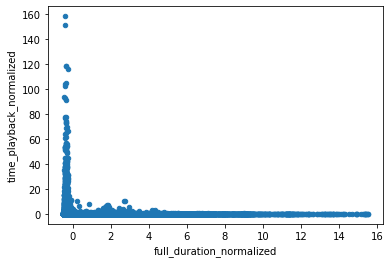

In [8]:
time_playback_normalized[["full_duration","playback_count"]].plot.scatter(x = 'full_duration', y = 'playback_count',xlabel = "full_duration_normalized", ylabel = "time_playback_normalized")

Nhận xét: Sau khi thể hiện lên scatter, ta có thể nhận thấy

- khi "full_duration_normalize" > 0 thì không có bản track nào có "playcount_back_normalize" > 20.
- Tất các các bản track có "playcount_back_normalize" > 20 đều nằm nơi "full_duration_normalize" < 0.

=> như vậy có thể kết luận được rằng, thời lượng bản track có ảnh hưởng đến số lượng nghe.


# Đi sau hơn về câu hỏi: Vậy nên tạo một bản track trong khoảng bao lâu để có nhiều lượt playback
- Bảng dữ liệu cần sử dụng: track.csv
- Các trường cần sử dụng: `full_duration` , `playback_count`
- Hướng giải quyết: khảo sát các bài có playback_count_normalize > 20 (bài hit) sau đó, sử dụng **Histogram** - biểu đồ thể hiện phân phối của `full_duration` (chỉ trong các bài hit)
- Dự đoán kết quả: track có khoảng thời gian nằm trong khoảng 2 đến 5p sẽ 

In [9]:
time_playback_normalized[time_playback_normalized["playback_count"] > 20]

,full_duration,playback_count
15063,-0.293084,41.303363
15068,-0.269867,20.796400
20858,-0.341641,23.496339
21031,-0.347060,34.890241
21039,-0.261978,31.326720
...,...,...
629070,-0.369933,20.384445
630406,-0.293720,28.061891
630421,-0.317248,28.466132
630461,-0.379441,33.923841


Ở đây có tất cả là 252 sample. như vậy, quay về dữ liệu gốc, ta sẽ đi khảo sát 252 sample có số lượng playback_count cao nhất.

In [10]:
filter_track = df_track[["full_duration","playback_count"]].sort_values('playback_count',ascending = False).head(252)
filter_track

,full_duration,playback_count
629013,151131,295836622.0
77004,146611,282538791.0
109962,176656,221005478.0
623917,176656,220920029.0
623994,334555,217028126.0
...,...,...
313509,332047,37764638.0
248101,218560,37761532.0
600675,271176,37628835.0
580228,270182,37624546.0


## Trực quan hóa bằng histogram. attribute "full_duration" được chia bin theo thuật toán của thư viện seaborn

In [11]:
mean = filter_track["full_duration"].mean()
median = filter_track["full_duration"].median()

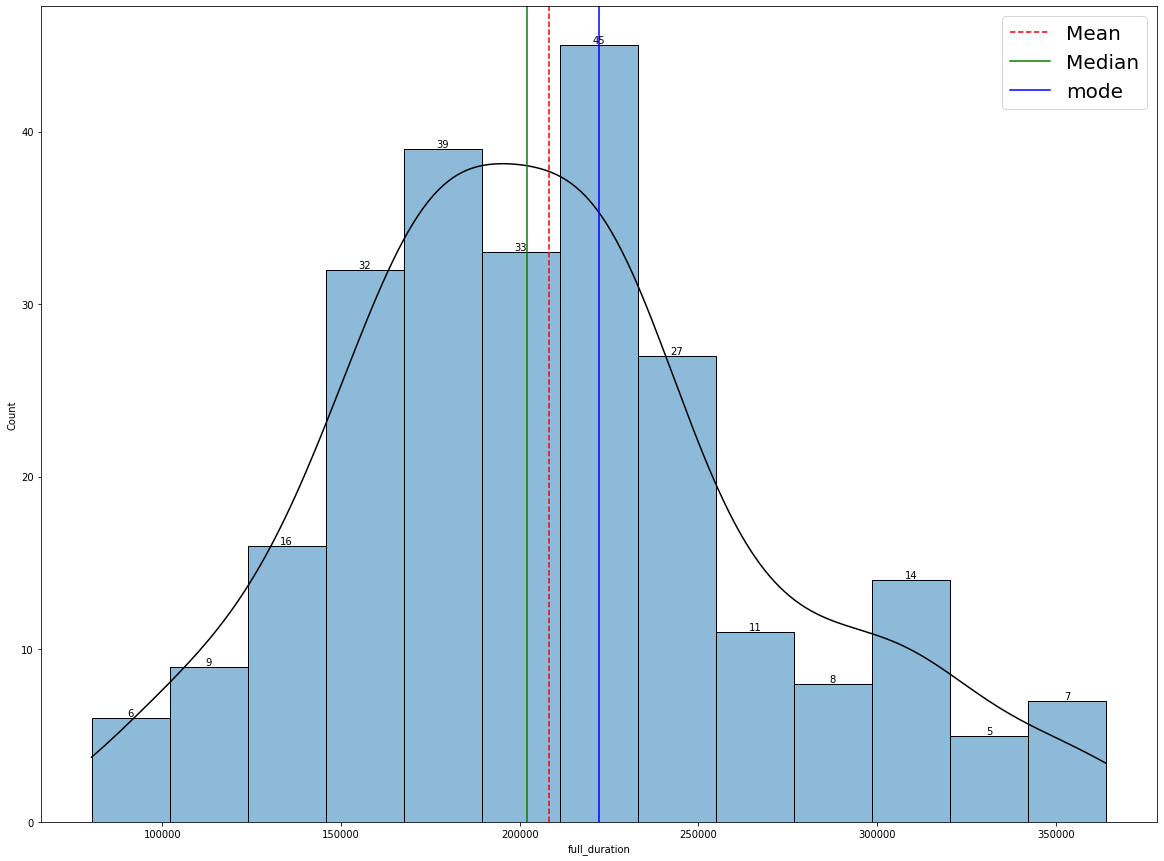

In [12]:
# ax = sns.countplot(y="binned", data=deathrate)
plt.figure(figsize = (20,15))
graph = sns.histplot(x="full_duration", data=filter_track,kde=True)


mode = (-1,-1)
graph.lines[0].set_color('black')
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")
    if height > mode[0]:
        mode = (height,p.get_x()+p.get_width()/2.)
        
plt.axvline(mean, color='r', linestyle='--', label="Mean")
plt.axvline(median, color='g', linestyle='-', label="Median")
plt.axvline(mode[1], color='b', linestyle='-', label="mode")
plt.legend(prop={'size': 20})


In [13]:
graph.patches[0].get_width()

21840.46153846153

dữ liệu được chia bin với giá trị khoảng 21840 ms (tương đương 21.8 giây)

In [14]:
print("mean = " , mean)
print("mode = " , mode[1])
print("median = " , median)

mean =  208058.50793650793
mode =  222113.0
median =  201957.0


Nhận xét: Khá bất ngờ khi dữ liệu ở đây gần như là một phân phối chuẩn. với trung bình là 208058 ms
- từ đó, có thể tự tin kết luận rằng, những track "hit", có thời gian trung bình là 208058ms tương đương 3.4 phút.
- Khi tạo một bản track mà muốn hit trên soundcloud, ta nên tạo một bản có thời gian từ 150000ms đến 250000ms tức 2.5 phút cho đến 4.1 phút.